# Laboratorio 2 (Optimización de Redes)

- Santiago Navarrete 202211202
- Andrea Galindo 202122477
- Luis Fernando Ruiz 202211513

In [150]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

## **Problema 1 (Transporte)**

#### Solución Original (Datos Originales)

In [151]:
M = ConcreteModel()

# Para acceso a la solución dual
M.dual = Suffix(direction=Suffix.IMPORT)

origen = RangeSet(1, 2)
destino = RangeSet(1, 6)

# Variables
M.x = Var(destino, origen, domain=NonNegativeReals)

# Diccionario de ciudades de origen con capacidad
dicOrigen = {
    1: ['Bogota', 550],
    2: ['Medellin', 700]
}

# Diccionario de destinos con demanda
dicDestino = {
    1: ['Cali', 125],
    2: ['Barranquilla', 175],
    3: ['Pasto', 225],
    4: ['Tunja', 250],
    5: ['Chía', 225],
    6: ['Manizales', 200]
}

# Diccionario de precios de transporte
dicPrecios = {
    (1, 1): 999,
    (2, 1): 2.5,
    (3, 1): 1.6,
    (4, 1): 1.4,
    (5, 1): 0.8,
    (6, 1): 1.4,
    (1, 2): 2.5,
    (2, 2): 999,
    (3, 2): 2.0,
    (4, 2): 1.0,
    (5, 2): 1.0,
    (6, 2): 0.8
}

# Función objetivo
M.obj = Objective(expr=sum(M.x[i, j] * dicPrecios[(i, j)] for i in destino for j in origen), sense=minimize)

# Restricciones de demanda
M.demanda = ConstraintList()
for i in destino:
    M.demanda.add(sum(M.x[i, j] for j in origen) == dicDestino[i][1])

# Restricciones de capacidad
M.capacidad = ConstraintList()
for i in origen:
    M.capacidad.add(sum(M.x[j, i] for j in destino) <= dicOrigen[i][1])

# Resolver el modelo
results=SolverFactory('glpk').solve(M)

print("El valor óptimo de costos es: ", M.obj())

El valor óptimo de costos es:  1715.0


#### Análisis de Sensibilidad Original

In [152]:
if 'ok' == str(results.Solver.status):    
    print("Customer      Demand   Shipped    Margin")
    for c in destino:
        print(f"{dicDestino[c][0]:10s}{dicDestino[c][1]:10.1f}{M.demanda[c]():10.1f}{M.dual[M.demanda[c]]:10.4f}")
else:
    print("No Valid Solution Found")

print("\n")

if 'ok' == str(results.Solver.status):    
    print("Customer      Capacity   Shipped    Margin")
    for c in origen:
        print(f"{dicOrigen[c][0]:10s}{dicOrigen[c][1]:10.1f}{M.capacidad[c]():10.1f}{M.dual[M.capacidad[c]]:10.4f}")
else:
    print("No Valid Solution Found")

Customer      Demand   Shipped    Margin
Cali           125.0     125.0    2.5000
Barranquilla     175.0     175.0    2.7000
Pasto          225.0     225.0    1.8000
Tunja          250.0     250.0    1.0000
Chía           225.0     225.0    1.0000
Manizales      200.0     200.0    0.8000


Customer      Capacity   Shipped    Margin
Bogota         550.0     550.0   -0.2000
Medellin       700.0     650.0    0.0000


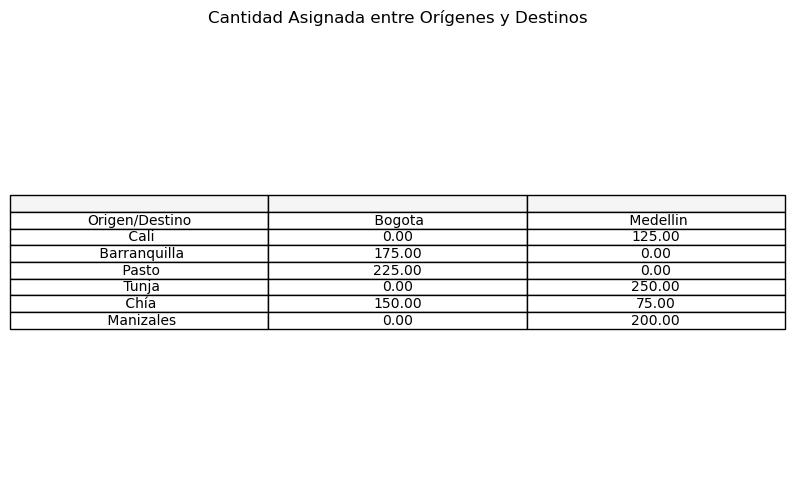

In [153]:
# Preparar datos para la matriz de resultados usando los valores de M.x
result_matrix = np.zeros((len(destino), len(origen)))

for i in destino:
    for j in origen:
        result_matrix[i - 1, j - 1] = M.x[i, j].value if M.x[i, j].value is not None else 0

# Crear la tabla sin colores
fig, ax = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño de la figura aquí
ax.axis('tight')
ax.axis('off')
table_data = [['Origen/Destino'] + [f' {dicOrigen[j][0]}' for j in origen]]
for i in destino:
    row = [f' {dicDestino[i][0]}'] + [f'{result_matrix[i - 1, j - 1]:.2f}' for j in origen]
    table_data.append(row)

table = ax.table(cellText=table_data, cellLoc='center', loc='center', colColours=['#f5f5f5'] * (len(origen) + 1))

# Mostrar gráfico
plt.title('Cantidad Asignada entre Orígenes y Destinos')
plt.show()

#### Solución Moviendo 50 Toneladas de Medellín a Bogotá

In [154]:
# Modelo
M = ConcreteModel()

# Para acceso a la solución dual
M.dual = Suffix(direction=Suffix.IMPORT)

origen = RangeSet(1, 2)
destino = RangeSet(1, 6)

# Variables
M.x = Var(destino, origen, domain=NonNegativeReals)

# Diccionario de ciudades de origen con capacidad
dicOrigen = {
    1: ['Bogota', 600],
    2: ['Medellin', 650]
}

# Diccionario de destinos con demanda
dicDestino = {
    1: ['Cali', 125],
    2: ['Barranquilla', 175],
    3: ['Pasto', 225],
    4: ['Tunja', 250],
    5: ['Chía', 225],
    6: ['Manizales', 200]
}

# Diccionario de precios de transporte
dicPrecios = {
    (1, 1): 999,
    (2, 1): 2.5,
    (3, 1): 1.6,
    (4, 1): 1.4,
    (5, 1): 0.8,
    (6, 1): 1.4,
    (1, 2): 2.5,
    (2, 2): 999,
    (3, 2): 2.0,
    (4, 2): 1.0,
    (5, 2): 1.0,
    (6, 2): 0.8
}

# Función objetivo
M.obj = Objective(expr=sum(M.x[i, j] * dicPrecios[(i, j)] for i in destino for j in origen), sense=minimize)

# Restricciones de demanda
M.demanda = ConstraintList()
for i in destino:
    M.demanda.add(sum(M.x[i, j] for j in origen) == dicDestino[i][1])

# Restricciones de capacidad
M.capacidad = ConstraintList()
for i in origen:
    M.capacidad.add(sum(M.x[j, i] for j in destino) <= dicOrigen[i][1])

# Resolver el modelo
results=SolverFactory('glpk').solve(M)

print("El valor óptimo de costos es: ", M.obj())

El valor óptimo de costos es:  1705.0


#### Análisis de sensibilidad (Moviendo las toneladas)

In [155]:
# Análisis de sensibilidad
if 'ok' == str(results.Solver.status):    
    print("Customer      Demand   Shipped    Margin")
    for c in destino:
        print(f"{dicDestino[c][0]:10s}{dicDestino[c][1]:10.1f}{M.demanda[c]():10.1f}{M.dual[M.demanda[c]]:10.4f}")
else:
    print("No Valid Solution Found")

print("\n")

if 'ok' == str(results.Solver.status):    
    print("Customer      Capacity   Shipped    Margin")
    for c in origen:
        print(f"{dicOrigen[c][0]:10s}{dicOrigen[c][1]:10.1f}{M.capacidad[c]():10.1f}{M.dual[M.capacidad[c]]:10.4f}")
else:
    print("No Valid Solution Found")

Customer      Demand   Shipped    Margin
Cali           125.0     125.0    2.5000
Barranquilla     175.0     175.0    2.7000
Pasto          225.0     225.0    1.8000
Tunja          250.0     250.0    1.0000
Chía           225.0     225.0    1.0000
Manizales      200.0     200.0    0.8000


Customer      Capacity   Shipped    Margin
Bogota         600.0     600.0   -0.2000
Medellin       650.0     600.0    0.0000


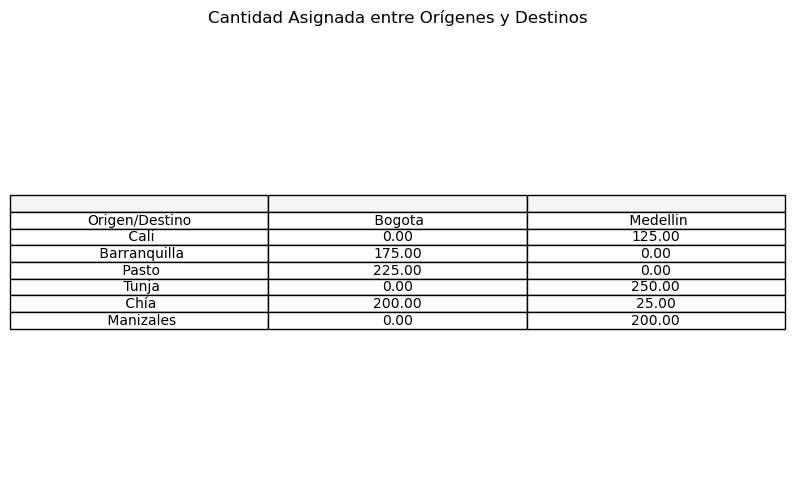

In [156]:
# Preparar datos para la matriz de resultados usando los valores de M.x
result_matrix = np.zeros((len(destino), len(origen)))

for i in destino:
    for j in origen:
        result_matrix[i - 1, j - 1] = M.x[i, j].value if M.x[i, j].value is not None else 0

# Crear la tabla sin colores
fig, ax = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño de la figura aquí
ax.axis('tight')
ax.axis('off')
table_data = [['Origen/Destino'] + [f' {dicOrigen[j][0]}' for j in origen]]
for i in destino:
    row = [f' {dicDestino[i][0]}'] + [f'{result_matrix[i - 1, j - 1]:.2f}' for j in origen]
    table_data.append(row)

table = ax.table(cellText=table_data, cellLoc='center', loc='center', colColours=['#f5f5f5'] * (len(origen) + 1))

# Mostrar gráfico
plt.title('Cantidad Asignada entre Orígenes y Destinos')
plt.show()

## **Problema 2 (Rutas Óptimas)**

### Carga de Datos

In [157]:
archivo = open('proof_case.csv', 'r+')
linea = archivo.readline()
linea = archivo.readline()

cost_matriz = {}
indice = 0

while len(linea) > 0:
    lista = linea.split(",")
    for i in range(len(lista)):
        cost_matriz[(indice, i)] = int(lista[i])
    indice += 1
    linea = archivo.readline()

archivo.close()

### Solución

In [158]:
M = ConcreteModel()

n = len(lista) # cantidad de ciudades
m = 2          # cantidad de equipos

origen = 0     # se define la ciudad de origen para todos los equipos

localidades = RangeSet(0, n - 1)
equipos = RangeSet(1,m)

#Variables Decisión
M.x = Var(localidades, localidades, equipos, domain=Binary)
M.u = Var(localidades, equipos, domain=NonNegativeReals)


# Función objetivo: Minimizar la suma de los costos recorridos por todos los equipos
M.obj = Objective(expr=sum(M.x[i, j, k] * cost_matriz[(i, j)] 
                           for i in localidades for j in localidades for k in equipos if i != j), 
                  sense=minimize)

# Se fija el nodo origen para los equipos
for k in equipos:
    M.u[origen, k].fix(0)

# Restricciones
M.res1 = ConstraintList()

# Cada equipo debe salir del nodo de origen
for k in equipos:
    M.res1.add(sum(M.x[origen, j, k] for j in localidades if origen != j) == 1)

# Cada localidad (excepto el nodo de origen) debe ser asignada a exactamente un equipo
for i in localidades:
    if i != origen:
        M.res1.add(sum(M.x[i, j,k] for j in localidades for k in equipos if j!=i) == 1)

# Restricción de que cada equipo debe entrar y salir de cada localidad exactamente una vez
for k in equipos:
    for i in localidades:
        if i != origen:
            M.res1.add(sum(M.x[i, j, k] for j in localidades if i != j) == sum(M.x[j, i, k] for j in localidades if i != j))

# Permitir que los equipos vuelvan al nodo de origen para completar el ciclo
for k in equipos:
    M.res1.add(sum(M.x[i, origen, k] for i in localidades if i != origen) == 1)

# Restricciones MTZ para prevenir subtours (excluyendo el nodo de origen)
for k in equipos:
    for i in localidades:
        for j in localidades:
            if i != j and i != origen and j != origen:  # Excluir el nodo de origen
                M.res1.add(M.u[i,k] - M.u[j,k] + (n - 1) * M.x[i, j,k] <= n - 2)


solver = SolverFactory('glpk')
result = solver.solve(M)


if result.solver.status == SolverStatus.ok and result.solver.termination_condition == TerminationCondition.optimal:
    print("Valor de la función objetivo:", M.obj())

# Mostrar las rutas activadas para cada equipo
for k in equipos:
    for i in localidades:
        for j in localidades:
            if M.x[i, j,k].value is not None and M.x[i, j,k].value > 0.9:
                print(f"Equipo {k} viaja de {i} a {j}")


Valor de la función objetivo: 9.0
Equipo 1 viaja de 0 a 4
Equipo 1 viaja de 1 a 0
Equipo 1 viaja de 3 a 1
Equipo 1 viaja de 4 a 3
Equipo 2 viaja de 0 a 5
Equipo 2 viaja de 2 a 0
Equipo 2 viaja de 5 a 2


### Visualización de Rutas

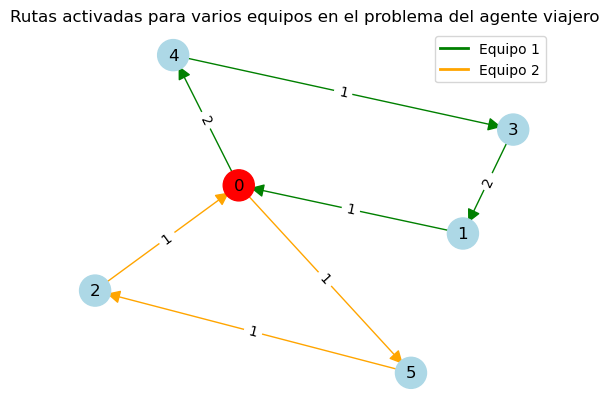

In [159]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Para la leyenda

# Crear un grafo dirigido
G = nx.DiGraph()

# Definir colores para los equipos
colors = ['blue', 'green', 'orange', 'purple', 'red', 'yellow']  # Se pueden agregar más colores si es necesario
equipo_color = {k: colors[k % len(colors)] for k in equipos}

# Añadir nodos al grafo (ciudades/localidades)
for i in localidades:
    G.add_node(i, label=f'Ciudad {i}')

# Añadir aristas a partir de las rutas activadas para cada equipo
for k in equipos:
    for i in localidades:
        for j in localidades:
            if M.x[i, j, k].value is not None and M.x[i, j, k].value > 0.9:
                G.add_edge(i, j, equipo=k, weight=cost_matriz[(i, j)])  # Añadir arista con el equipo correspondiente

# Posiciones para todos los nodos
pos = nx.spring_layout(G)  # Layout para la visualización

# Dibujar los nodos, pintar el nodo de origen de rojo y los demás de azul claro
node_colors = ['red' if i == origen else 'lightblue' for i in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)

# Dibujar las etiquetas de los nodos
nx.draw_networkx_labels(G, pos)

# Dibujar las aristas por equipo con colores diferentes
for k in equipos:
    edges = [(i, j) for i, j in G.edges() if G[i][j]['equipo'] == k]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=equipo_color[k], arrowstyle='-|>', arrowsize=20)

# Etiquetas en las aristas con los pesos (costos)
edge_labels = {(i, j): f'{G[i][j]["weight"]}' for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Crear una leyenda manual para los equipos
legend_elements = [Line2D([0], [0], color=equipo_color[k], lw=2, label=f'Equipo {k}') for k in equipos]
plt.legend(handles=legend_elements, loc='best')

# Mostrar el grafo
plt.title('Rutas activadas para varios equipos en el problema del agente viajero')
plt.axis('off')  # Ocultar los ejes para mejorar la visualización
plt.show()


## **Problema 3 (Sensores)**

#### Carga de Datos

In [160]:
#carga de archivos
archivo= open('sensors.csv','r+')
linea=archivo.readline()
num_sensores={}
while len(linea)>0:
    lista = linea.split(", ")
    for i in range(len(lista)):
        num_sensores[i+1]='S'+str(i+1)
    linea=archivo.readline()

# print(num_sensores)

archivo= open('locations.csv','r+')
linea=archivo.readline()
num_localidades={}
while len(linea)>0:
    lista = linea.split(", ")
    for i in range(len(lista)):
        num_localidades[i+1]='L'+str(i+1)
    linea=archivo.readline()

# print(num_localidades)

archivo= open('sensor_coverage.csv','r+')
linea=archivo.readline()
linea=archivo.readline()
coverage_matrix={}
while len(linea)>0:
    lista = linea.split(",")
    for i in range(1,len(lista)):  
        coverage_matrix[('S'+str(i),lista[0])]=int(lista[i].replace("\n",""))
    linea=archivo.readline()

# print(coverage_matrix)

archivo= open('energy_consumption.csv','r+')
linea=archivo.readline()
linea=archivo.readline()
costos_energia={}
while len(linea)>0:
    lista = linea.split(",")
    costos_energia[lista[0]]=int(lista[1].replace("\n",""))
    linea=archivo.readline()

# print(costos_energia)

archivo= open('communication_costs.csv','r+')
linea=archivo.readline()
linea=archivo.readline()
costos_comunicacion={}
while len(linea)>0:
    lista = linea.split(",")
    costos_comunicacion[(lista[1],lista[0])]=int(lista[2].replace("\n",""))
    linea=archivo.readline()

# print(costos_comunicacion)

archivo= open('installation_costs.csv','r+')
linea=archivo.readline()
linea=archivo.readline()
costos_instalacion={}
while len(linea)>0:
    lista = linea.split(",")
    costos_instalacion[lista[0]]=int(lista[1].replace("\n",""))
    linea=archivo.readline()

#print(costos_instalacion)

archivo= open('Matriz_Adyacencia.csv','r+')
linea=archivo.readline()
linea=archivo.readline()
adjacency_matrix={}
indice=1
while len(linea)>0:
    
    lista = linea.split(",")
    for i in range(1,len(lista)):
        adjacency_matrix[(num_localidades[indice],num_localidades[i])]=int(lista[i])
    indice+=1
    linea=archivo.readline()

#print(adjacency_matrix)

### Solución (Todos los costos)

#### Solución 1
Cada localidad debe ser cubierta por al menos un sensor

In [161]:
M = ConcreteModel()

sensores = RangeSet(1,len(num_sensores))
localidades = RangeSet(1,len(num_localidades))

M.x = Var(sensores, localidades, domain=Binary)

M.obj = Objective(expr = sum(M.x[i,j]*(costos_energia[num_sensores[i]]+costos_comunicacion[(num_sensores[i],num_localidades[j])]+costos_instalacion[num_localidades[j]])  for i in sensores for j in localidades ), sense = minimize)
 
M.res1 = ConstraintList()

for i in sensores:
    for j in localidades:
            M.res1.add((M.x[i,j]-coverage_matrix[(num_sensores[i],num_localidades[j])])<=0)

for j in localidades:
    M.res1.add((sum(M.x[i,k]*adjacency_matrix[(num_localidades[j],num_localidades[k])]  for k in localidades for i in sensores)) >=1)

SolverFactory('glpk').solve(M)
#M.display()

print("El costo mínimo de instalar los sensores es:", M.obj())

El costo mínimo de instalar los sensores es: 457.0


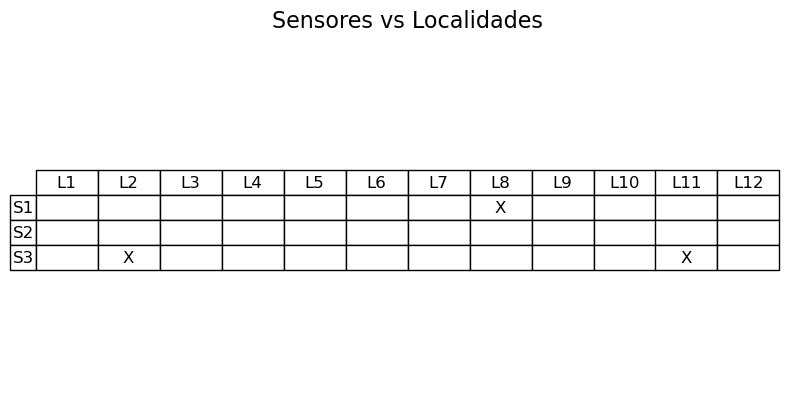

In [162]:
# Crear un diccionario para almacenar la tabla sensores vs localidades
tabla = {num_localidades[j]: ['' for i in sensores] for j in localidades}

# Llenar la tabla con 'X' donde el sensor esté asignado a una localidad
for i in sensores:  # Sensores
    for j in localidades:  # Localidades
        if M.x[i, j].value > 0.9:  # Si el valor es 1, significa que el sensor está asignado a la localidad
            tabla[num_localidades[j]][i-1] = 'X'  # Colocamos una 'X' en la celda correspondiente

# Crear un DataFrame para mostrar la tabla
df_tabla = pd.DataFrame(tabla, index=[num_sensores[i] for i in sensores])

# Mostrar la tabla con matplotlib
fig, ax = plt.subplots()

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_tabla.values, colLabels=df_tabla.columns, rowLabels=df_tabla.index, cellLoc='center', loc='center')

# Ajustar el tamaño de la fuente y el diseño de la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("Sensores vs Localidades", fontsize=16)
plt.show()


#### Solución 2
Cada sensor debe cubrir todas las localidades

In [163]:
M = ConcreteModel()

sensores = RangeSet(1,len(num_sensores))
localidades = RangeSet(1,len(num_localidades))

M.x = Var(sensores, localidades, domain=Binary)

M.obj = Objective(expr = sum(M.x[i,j]*(costos_energia[num_sensores[i]]+costos_comunicacion[(num_sensores[i],num_localidades[j])]+costos_instalacion[num_localidades[j]])  for i in sensores for j in localidades ), sense = minimize)
 
M.res1 = ConstraintList()

for i in sensores:
    for j in localidades:
            M.res1.add((M.x[i,j]-coverage_matrix[(num_sensores[i],num_localidades[j])])<=0)
for i in sensores:
    for j in localidades:
        M.res1.add((sum(M.x[i,k]*adjacency_matrix[(num_localidades[j],num_localidades[k])]  for k in localidades )) >=1)

SolverFactory('glpk').solve(M)
#M.display()

print("El costo mínimo de instalar los sensores es:", M.obj())

El costo mínimo de instalar los sensores es: 1448.0


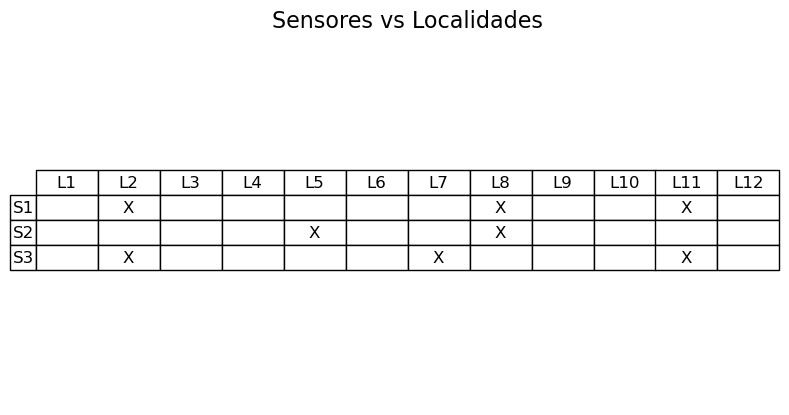

In [164]:
# Crear un diccionario para almacenar la tabla sensores vs localidades
tabla = {num_localidades[j]: ['' for i in sensores] for j in localidades}

# Llenar la tabla con 'X' donde el sensor esté asignado a una localidad
for i in sensores:  # Sensores
    for j in localidades:  # Localidades
        if M.x[i, j].value > 0.9:  # Si el valor es 1, significa que el sensor está asignado a la localidad
            tabla[num_localidades[j]][i-1] = 'X'  # Colocamos una 'X' en la celda correspondiente

# Crear un DataFrame para mostrar la tabla
df_tabla = pd.DataFrame(tabla, index=[num_sensores[i] for i in sensores])

# Mostrar la tabla con matplotlib
fig, ax = plt.subplots()

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_tabla.values, colLabels=df_tabla.columns, rowLabels=df_tabla.index, cellLoc='center', loc='center')

# Ajustar el tamaño de la fuente y el diseño de la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("Sensores vs Localidades", fontsize=16)
plt.show()


### Solución (Solo con costo de Instalación)

#### Solución 1
Cada localidad debe ser cubierta por al menos un sensor

In [165]:
M = ConcreteModel()

sensores = RangeSet(1,len(num_sensores))
localidades = RangeSet(1,len(num_localidades))

M.x = Var(sensores, localidades, domain=Binary)

M.obj = Objective(expr = sum(M.x[i,j]*costos_instalacion[num_localidades[j]]  for i in sensores for j in localidades ), sense = minimize)
 
M.res1 = ConstraintList()

for i in sensores:
    for j in localidades:
            M.res1.add((M.x[i,j]-coverage_matrix[(num_sensores[i],num_localidades[j])])<=0)

for j in localidades:
    M.res1.add((sum(M.x[i,k]*adjacency_matrix[(num_localidades[j],num_localidades[k])]  for k in localidades for i in sensores)) >=1)

SolverFactory('glpk').solve(M)
#M.display()

print("El costo mínimo de instalar los sensores es:", M.obj())

El costo mínimo de instalar los sensores es: 350.0


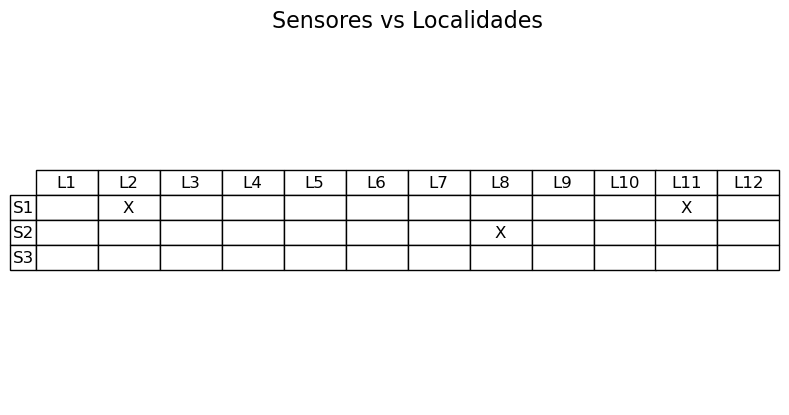

In [166]:
# Crear un diccionario para almacenar la tabla sensores vs localidades
tabla = {num_localidades[j]: ['' for i in sensores] for j in localidades}

# Llenar la tabla con 'X' donde el sensor esté asignado a una localidad
for i in sensores:  # Sensores
    for j in localidades:  # Localidades
        if M.x[i, j].value > 0.9:  # Si el valor es 1, significa que el sensor está asignado a la localidad
            tabla[num_localidades[j]][i-1] = 'X'  # Colocamos una 'X' en la celda correspondiente

# Crear un DataFrame para mostrar la tabla
df_tabla = pd.DataFrame(tabla, index=[num_sensores[i] for i in sensores])

# Mostrar la tabla con matplotlib
fig, ax = plt.subplots()

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_tabla.values, colLabels=df_tabla.columns, rowLabels=df_tabla.index, cellLoc='center', loc='center')

# Ajustar el tamaño de la fuente y el diseño de la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("Sensores vs Localidades", fontsize=16)
plt.show()

#### Solución 2
Cada sensor debe cubrir todas las localidades

In [167]:
M = ConcreteModel()

sensores = RangeSet(1,len(num_sensores))
localidades = RangeSet(1,len(num_localidades))

M.x = Var(sensores, localidades, domain=Binary)

M.obj = Objective(expr = sum(M.x[i,j]*costos_instalacion[num_localidades[j]]  for i in sensores for j in localidades ), sense = minimize)
 
M.res1 = ConstraintList()

for i in sensores:
    for j in localidades:
            M.res1.add((M.x[i,j]-coverage_matrix[(num_sensores[i],num_localidades[j])])<=0)
for i in sensores:
    for j in localidades:
        M.res1.add((sum(M.x[i,k]*adjacency_matrix[(num_localidades[j],num_localidades[k])]  for k in localidades )) >=1)

SolverFactory('glpk').solve(M)
#M.display()

print("El costo mínimo de instalar los sensores es:", M.obj())

El costo mínimo de instalar los sensores es: 1150.0


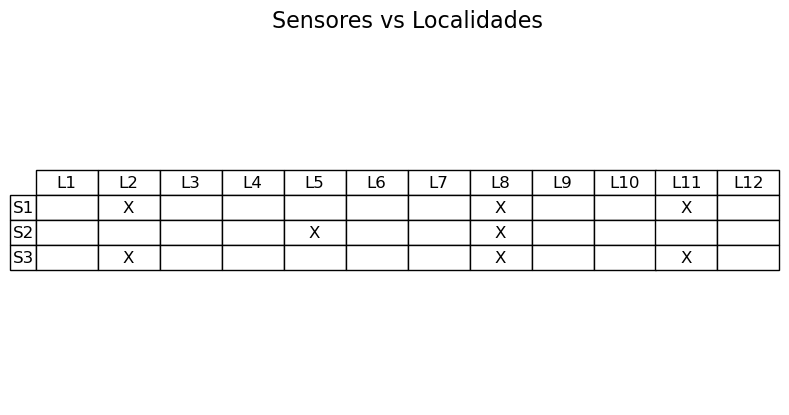

In [168]:
# Crear un diccionario para almacenar la tabla sensores vs localidades
tabla = {num_localidades[j]: ['' for i in sensores] for j in localidades}

# Llenar la tabla con 'X' donde el sensor esté asignado a una localidad
for i in sensores:  # Sensores
    for j in localidades:  # Localidades
        if M.x[i, j].value > 0.9:  # Si el valor es 1, significa que el sensor está asignado a la localidad
            tabla[num_localidades[j]][i-1] = 'X'  # Colocamos una 'X' en la celda correspondiente

# Crear un DataFrame para mostrar la tabla
df_tabla = pd.DataFrame(tabla, index=[num_sensores[i] for i in sensores])

# Mostrar la tabla con matplotlib
fig, ax = plt.subplots()

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_tabla.values, colLabels=df_tabla.columns, rowLabels=df_tabla.index, cellLoc='center', loc='center')

# Ajustar el tamaño de la fuente y el diseño de la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("Sensores vs Localidades", fontsize=16)
plt.show()